# LSTM Sample 2 - Logistics Chaos
Inport the main libraries including the keras libraries we need. 
Note: keras has FutureWarning error message. That is OL

In [4]:
import numpy as np # linear algebra
import pandas # data processing, CSV file I/O (e.g. pandas.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

# Generate time series using logistics map function

Create a one dimensional array to represent the time series data. Then reformat it for LSTM.
See https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/ for details.
<br>
array y could be the training data since it is shifted ahead in time, but we later generating the y output data using the x input data

In [7]:
def logistic(r, x):
    return r * x * (1 - x)

In [8]:
    SEQUENCE_SIZE = 100         # length of the sequence to generate
    START_SKIP = 10            # number of values to skip at the start so function can stablize
    old_num = 1
    num = 0.25
#    r = 3.9                 #chaotic value
    r = 3.6                 #chaotic value
#    r = 3.5                 #four value cycle
#    r = 3.4                  #two value cycle
    x = []
    y = []

    for i in range(START_SKIP+SEQUENCE_SIZE):
        #print("i = " ,i)
        old_num = num
        num = logistic(r,num)
        #print("num = " ,num)
        if i > START_SKIP:
            x.append(old_num)
            y.append(num)
        


In [9]:
#print (x.head)
arr_x = np.array(x)
print (arr_x)

[0.35830315 0.82771921 0.51336044 0.8993574  0.32584922 0.79081742
 0.59553083 0.8671459  0.414734   0.87382696 0.39691227 0.86174251
 0.42891249 0.88180764 0.37520255 0.84393214 0.47415845 0.89759597
 0.3309028  0.79706209 0.58231482 0.87560738 0.39210876 0.85809413
 0.43836695 0.88632492 0.362711   0.83214623 0.50284398 0.89997088
 0.32408386 0.78859264 0.60017145 0.86387645 0.42333814 0.87884265
 0.38332169 0.85099022 0.45650113 0.89318825 0.34345079 0.81177244
 0.5500726  0.89097385 0.34970202 0.81867787 0.5343999  0.89573993
 0.33620367 0.80341475 0.56858217 0.88306735 0.37173386 0.84077207
 0.48194783 0.89882683 0.32737378 0.79272068 0.59153258 0.86983843
 0.40759033 0.86925763 0.4091357  0.87027724 0.40642115 0.8684748
 0.41121477 0.87162186 0.4028299  0.8660087  0.41773548 0.87563718
 0.39202816 0.85803149 0.43852842 0.88639648 0.36251193 0.83194931
 0.50331476 0.89996044 0.32411391 0.78863071 0.60009234 0.86393349
 0.4231887  0.87876009 0.38354686 0.8511792  0.45602341 0.89303

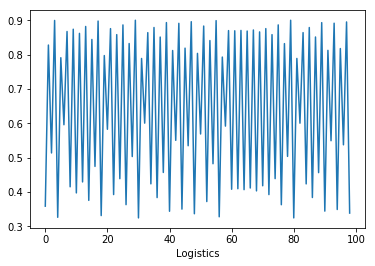

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(arr_x)
# plt.ylabel('some numbers')
plt.xlabel('Logistics')
plt.show()

# Convert data into format for keras

Input is single values and output is single value predicting next value in time series.
<br>
Time series in broken into smaller sequences of 10 values. 

In [36]:
# split into train and test sets
train_size = int(len(arr_x) * 0.70)
test_size = len(arr_x) - train_size
log_train = arr_x[0:train_size]
log_test  = arr_x[train_size:len(arr_x)]
print ("train shape : " , log_train.shape)
print ("test shape : " , log_test.shape)

99
train shape :  (99,)
test shape :  (0,)


The above sets up the 1-d sin data for input into a LSTM system 


In [30]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    

In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,log_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,log_test)
print(y_train)
print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

[0.39691227 0.86174251 0.42891249 0.88180764 0.37520255 0.84393214
 0.47415845 0.89759597 0.3309028  0.79706209 0.58231482 0.87560738
 0.39210876 0.85809413 0.43836695 0.88632492 0.362711   0.83214623
 0.50284398 0.89997088 0.32408386 0.78859264 0.60017145 0.86387645
 0.42333814 0.87884265 0.38332169 0.85099022 0.45650113 0.89318825
 0.34345079 0.81177244 0.5500726  0.89097385 0.34970202 0.81867787
 0.5343999  0.89573993 0.33620367 0.80341475 0.56858217 0.88306735
 0.37173386 0.84077207 0.48194783 0.89882683 0.32737378 0.79272068
 0.59153258 0.86983843 0.40759033 0.86925763 0.4091357  0.87027724
 0.40642115 0.8684748  0.41121477 0.87162186]
Shape of training set: (58, 10, 1)
Shape of test set: (19, 10, 1)


# Build NN model in Keras

Model has one LSTM layer followed by a fulling connected Dense layer. Final layer predicts next value in time sequence

In [16]:
print('Build model...')
model = Sequential()
model.add(LSTM(16, input_shape=(None, 1)))
model.add(Dense(6))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')



Build model...
Train...


In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,epochs=1000)

Train on 58 samples, validate on 19 samples
Epoch 1/1000
58/58 [==============================] - 1s 13ms/step - loss: 0.8712 - val_loss: 0.8280
Epoch 2/1000
58/58 [==============================] - 0s 719us/step - loss: 0.7834 - val_loss: 0.7452
Epoch 3/1000
58/58 [==============================] - 0s 747us/step - loss: 0.7054 - val_loss: 0.6703
Epoch 4/1000
58/58 [==============================] - 0s 715us/step - loss: 0.6317 - val_loss: 0.5996
Epoch 5/1000
58/58 [==============================] - 0s 751us/step - loss: 0.5643 - val_loss: 0.5342
Epoch 6/1000
58/58 [==============================] - 0s 683us/step - loss: 0.5006 - val_loss: 0.4739
Epoch 7/1000
58/58 [==============================] - 0s 682us/step - loss: 0.4440 - val_loss: 0.4181
Epoch 8/1000
58/58 [==============================] - 0s 841us/step - loss: 0.3885 - val_loss: 0.3668
Epoch 9/1000
58/58 [==============================] - 0s 727us/step - loss: 0.3394 - val_loss: 0.3192
Epoch 10/1000
58/58 [==================

58/58 [==============================] - 0s 580us/step - loss: 0.0436 - val_loss: 0.0433
Epoch 81/1000
58/58 [==============================] - 0s 627us/step - loss: 0.0435 - val_loss: 0.0432
Epoch 82/1000
58/58 [==============================] - 0s 724us/step - loss: 0.0435 - val_loss: 0.0432
Epoch 83/1000
58/58 [==============================] - 0s 705us/step - loss: 0.0434 - val_loss: 0.0431
Epoch 84/1000
58/58 [==============================] - 0s 781us/step - loss: 0.0433 - val_loss: 0.0430
Epoch 85/1000
58/58 [==============================] - 0s 869us/step - loss: 0.0432 - val_loss: 0.0430
Epoch 86/1000
58/58 [==============================] - 0s 710us/step - loss: 0.0432 - val_loss: 0.0429
Epoch 87/1000
58/58 [==============================] - 0s 812us/step - loss: 0.0431 - val_loss: 0.0429
Epoch 88/1000
58/58 [==============================] - 0s 756us/step - loss: 0.0430 - val_loss: 0.0428
Epoch 89/1000
58/58 [==============================] - 0s 739us/step - loss: 0.0429 - v

58/58 [==============================] - 0s 665us/step - loss: 0.0359 - val_loss: 0.0359
Epoch 159/1000
58/58 [==============================] - 0s 724us/step - loss: 0.0357 - val_loss: 0.0358
Epoch 160/1000
58/58 [==============================] - 0s 737us/step - loss: 0.0357 - val_loss: 0.0356
Epoch 161/1000
58/58 [==============================] - 0s 788us/step - loss: 0.0355 - val_loss: 0.0355
Epoch 162/1000
58/58 [==============================] - 0s 832us/step - loss: 0.0353 - val_loss: 0.0355
Epoch 163/1000
58/58 [==============================] - 0s 762us/step - loss: 0.0353 - val_loss: 0.0354
Epoch 164/1000
58/58 [==============================] - 0s 712us/step - loss: 0.0351 - val_loss: 0.0353
Epoch 165/1000
58/58 [==============================] - 0s 735us/step - loss: 0.0350 - val_loss: 0.0351
Epoch 166/1000
58/58 [==============================] - 0s 662us/step - loss: 0.0348 - val_loss: 0.0349
Epoch 167/1000
58/58 [==============================] - 0s 767us/step - loss: 0

58/58 [==============================] - 0s 790us/step - loss: 0.0212 - val_loss: 0.0217
Epoch 237/1000
58/58 [==============================] - 0s 649us/step - loss: 0.0209 - val_loss: 0.0215
Epoch 238/1000
58/58 [==============================] - 0s 741us/step - loss: 0.0206 - val_loss: 0.0213
Epoch 239/1000
58/58 [==============================] - 0s 656us/step - loss: 0.0206 - val_loss: 0.0212
Epoch 240/1000
58/58 [==============================] - 0s 765us/step - loss: 0.0202 - val_loss: 0.0210
Epoch 241/1000
58/58 [==============================] - 0s 665us/step - loss: 0.0200 - val_loss: 0.0205
Epoch 242/1000
58/58 [==============================] - 0s 672us/step - loss: 0.0196 - val_loss: 0.0202
Epoch 243/1000
58/58 [==============================] - 0s 599us/step - loss: 0.0194 - val_loss: 0.0200
Epoch 244/1000
58/58 [==============================] - 0s 624us/step - loss: 0.0191 - val_loss: 0.0198
Epoch 245/1000
58/58 [==============================] - 0s 575us/step - loss: 0

Epoch 315/1000
58/58 [==============================] - 0s 714us/step - loss: 0.0068 - val_loss: 0.0083
Epoch 316/1000
58/58 [==============================] - 0s 655us/step - loss: 0.0067 - val_loss: 0.0083
Epoch 317/1000
58/58 [==============================] - 0s 733us/step - loss: 0.0067 - val_loss: 0.0084
Epoch 318/1000
58/58 [==============================] - 0s 663us/step - loss: 0.0066 - val_loss: 0.0084
Epoch 319/1000
58/58 [==============================] - 0s 662us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 320/1000
58/58 [==============================] - 0s 697us/step - loss: 0.0066 - val_loss: 0.0084
Epoch 321/1000
58/58 [==============================] - 0s 630us/step - loss: 0.0065 - val_loss: 0.0082
Epoch 322/1000
58/58 [==============================] - 0s 660us/step - loss: 0.0065 - val_loss: 0.0081
Epoch 323/1000
58/58 [==============================] - 0s 687us/step - loss: 0.0064 - val_loss: 0.0081
Epoch 324/1000
58/58 [==============================] - 0s 610us

Epoch 394/1000
58/58 [==============================] - 0s 616us/step - loss: 0.0059 - val_loss: 0.0078
Epoch 395/1000
58/58 [==============================] - 0s 534us/step - loss: 0.0060 - val_loss: 0.0077
Epoch 396/1000
58/58 [==============================] - 0s 671us/step - loss: 0.0062 - val_loss: 0.0075
Epoch 397/1000
58/58 [==============================] - 0s 666us/step - loss: 0.0059 - val_loss: 0.0076
Epoch 398/1000
58/58 [==============================] - 0s 703us/step - loss: 0.0060 - val_loss: 0.0078
Epoch 399/1000
58/58 [==============================] - 0s 620us/step - loss: 0.0060 - val_loss: 0.0077
Epoch 400/1000
58/58 [==============================] - 0s 650us/step - loss: 0.0059 - val_loss: 0.0077
Epoch 401/1000
58/58 [==============================] - 0s 644us/step - loss: 0.0059 - val_loss: 0.0076
Epoch 402/1000
58/58 [==============================] - 0s 693us/step - loss: 0.0059 - val_loss: 0.0076
Epoch 403/1000
58/58 [==============================] - 0s 599us

58/58 [==============================] - 0s 564us/step - loss: 0.0057 - val_loss: 0.0075
Epoch 473/1000
58/58 [==============================] - 0s 538us/step - loss: 0.0058 - val_loss: 0.0076
Epoch 474/1000
58/58 [==============================] - 0s 665us/step - loss: 0.0058 - val_loss: 0.0075
Epoch 475/1000
58/58 [==============================] - 0s 709us/step - loss: 0.0058 - val_loss: 0.0073
Epoch 476/1000
58/58 [==============================] - 0s 683us/step - loss: 0.0058 - val_loss: 0.0074
Epoch 477/1000
58/58 [==============================] - 0s 668us/step - loss: 0.0057 - val_loss: 0.0075
Epoch 478/1000
58/58 [==============================] - 0s 805us/step - loss: 0.0060 - val_loss: 0.0077
Epoch 479/1000
58/58 [==============================] - 0s 639us/step - loss: 0.0058 - val_loss: 0.0073
Epoch 480/1000
58/58 [==============================] - 0s 792us/step - loss: 0.0057 - val_loss: 0.0073
Epoch 481/1000
58/58 [==============================] - 0s 625us/step - loss: 0

58/58 [==============================] - 0s 624us/step - loss: 0.0056 - val_loss: 0.0072
Epoch 551/1000
58/58 [==============================] - 0s 574us/step - loss: 0.0056 - val_loss: 0.0072
Epoch 552/1000
58/58 [==============================] - 0s 739us/step - loss: 0.0056 - val_loss: 0.0072
Epoch 553/1000
58/58 [==============================] - 0s 667us/step - loss: 0.0056 - val_loss: 0.0071
Epoch 554/1000
58/58 [==============================] - 0s 630us/step - loss: 0.0056 - val_loss: 0.0071
Epoch 555/1000
58/58 [==============================] - 0s 722us/step - loss: 0.0057 - val_loss: 0.0072
Epoch 556/1000
58/58 [==============================] - 0s 688us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 557/1000
58/58 [==============================] - 0s 665us/step - loss: 0.0057 - val_loss: 0.0071
Epoch 558/1000
58/58 [==============================] - 0s 708us/step - loss: 0.0056 - val_loss: 0.0072
Epoch 559/1000
58/58 [==============================] - 0s 900us/step - loss: 0

Epoch 628/1000
58/58 [==============================] - 0s 571us/step - loss: 0.0054 - val_loss: 0.0069
Epoch 629/1000
58/58 [==============================] - 0s 641us/step - loss: 0.0055 - val_loss: 0.0069
Epoch 630/1000
58/58 [==============================] - 0s 631us/step - loss: 0.0054 - val_loss: 0.0070
Epoch 631/1000
58/58 [==============================] - 0s 667us/step - loss: 0.0054 - val_loss: 0.0071
Epoch 632/1000
58/58 [==============================] - 0s 696us/step - loss: 0.0057 - val_loss: 0.0068
Epoch 633/1000
58/58 [==============================] - 0s 685us/step - loss: 0.0054 - val_loss: 0.0069
Epoch 634/1000
58/58 [==============================] - 0s 662us/step - loss: 0.0054 - val_loss: 0.0070
Epoch 635/1000
58/58 [==============================] - 0s 708us/step - loss: 0.0054 - val_loss: 0.0069
Epoch 636/1000
58/58 [==============================] - 0s 569us/step - loss: 0.0054 - val_loss: 0.0069
Epoch 637/1000
58/58 [==============================] - 0s 507us

58/58 [==============================] - 0s 562us/step - loss: 0.0052 - val_loss: 0.0067
Epoch 707/1000
58/58 [==============================] - 0s 610us/step - loss: 0.0052 - val_loss: 0.0067
Epoch 708/1000
58/58 [==============================] - 0s 514us/step - loss: 0.0052 - val_loss: 0.0066
Epoch 709/1000
58/58 [==============================] - 0s 594us/step - loss: 0.0052 - val_loss: 0.0066
Epoch 710/1000
58/58 [==============================] - 0s 775us/step - loss: 0.0052 - val_loss: 0.0066
Epoch 711/1000
58/58 [==============================] - 0s 690us/step - loss: 0.0053 - val_loss: 0.0067
Epoch 712/1000
58/58 [==============================] - 0s 705us/step - loss: 0.0052 - val_loss: 0.0065
Epoch 713/1000
58/58 [==============================] - 0s 651us/step - loss: 0.0052 - val_loss: 0.0065
Epoch 714/1000
58/58 [==============================] - 0s 699us/step - loss: 0.0051 - val_loss: 0.0068
Epoch 715/1000
58/58 [==============================] - 0s 611us/step - loss: 0

58/58 [==============================] - 0s 670us/step - loss: 0.0050 - val_loss: 0.0063
Epoch 785/1000
58/58 [==============================] - 0s 534us/step - loss: 0.0050 - val_loss: 0.0062
Epoch 786/1000
58/58 [==============================] - 0s 598us/step - loss: 0.0051 - val_loss: 0.0063
Epoch 787/1000
58/58 [==============================] - 0s 725us/step - loss: 0.0054 - val_loss: 0.0068
Epoch 788/1000
58/58 [==============================] - 0s 851us/step - loss: 0.0051 - val_loss: 0.0062
Epoch 789/1000
58/58 [==============================] - 0s 680us/step - loss: 0.0051 - val_loss: 0.0062
Epoch 790/1000
58/58 [==============================] - 0s 756us/step - loss: 0.0050 - val_loss: 0.0065
Epoch 791/1000
58/58 [==============================] - 0s 740us/step - loss: 0.0053 - val_loss: 0.0067
Epoch 792/1000
58/58 [==============================] - 0s 733us/step - loss: 0.0050 - val_loss: 0.0062
Epoch 793/1000
58/58 [==============================] - 0s 739us/step - loss: 0

Epoch 863/1000
58/58 [==============================] - 0s 953us/step - loss: 0.0048 - val_loss: 0.0064
Epoch 864/1000
58/58 [==============================] - 0s 622us/step - loss: 0.0049 - val_loss: 0.0060
Epoch 865/1000
58/58 [==============================] - 0s 743us/step - loss: 0.0049 - val_loss: 0.0060
Epoch 866/1000
58/58 [==============================] - 0s 737us/step - loss: 0.0048 - val_loss: 0.0060
Epoch 867/1000
58/58 [==============================] - 0s 699us/step - loss: 0.0049 - val_loss: 0.0060
Epoch 868/1000
58/58 [==============================] - 0s 688us/step - loss: 0.0047 - val_loss: 0.0063
Epoch 869/1000
58/58 [==============================] - 0s 709us/step - loss: 0.0048 - val_loss: 0.0061
Epoch 870/1000
58/58 [==============================] - 0s 670us/step - loss: 0.0049 - val_loss: 0.0059
Epoch 871/1000
58/58 [==============================] - 0s 703us/step - loss: 0.0049 - val_loss: 0.0062
Epoch 872/1000
58/58 [==============================] - 0s 649us

58/58 [==============================] - 0s 572us/step - loss: 0.0047 - val_loss: 0.0057
Epoch 942/1000
58/58 [==============================] - 0s 592us/step - loss: 0.0046 - val_loss: 0.0057
Epoch 943/1000
58/58 [==============================] - 0s 595us/step - loss: 0.0047 - val_loss: 0.0060
Epoch 944/1000
58/58 [==============================] - 0s 610us/step - loss: 0.0046 - val_loss: 0.0058
Epoch 945/1000
58/58 [==============================] - 0s 631us/step - loss: 0.0046 - val_loss: 0.0058
Epoch 946/1000
58/58 [==============================] - 0s 679us/step - loss: 0.0045 - val_loss: 0.0057
Epoch 947/1000
58/58 [==============================] - 0s 679us/step - loss: 0.0046 - val_loss: 0.0058
Epoch 948/1000
58/58 [==============================] - 0s 737us/step - loss: 0.0045 - val_loss: 0.0057
Epoch 949/1000
58/58 [==============================] - 0s 664us/step - loss: 0.0045 - val_loss: 0.0057
Epoch 950/1000
58/58 [==============================] - 0s 651us/step - loss: 0

In [18]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)


# Plot original values and predictions

Original (truth) values are shown in dotted line. Results of prediction of training data shown in orange while testing data is shown in green.

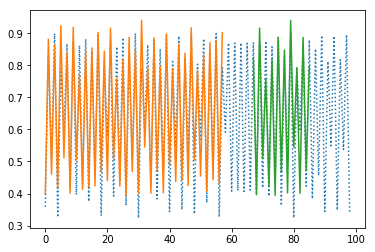

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
# plot baseline and predictions
plt.plot(arr_x, linestyle=':')

plt.plot(trainPredict)
list = np.arange(len(trainPredict)+9,len(trainPredict)+len(testPredict)+9)
plt.plot(list,testPredict)

In [20]:
arr_x[10:22]

array([0.39691227, 0.86174251, 0.42891249, 0.88180764, 0.37520255,
       0.84393214, 0.47415845, 0.89759597, 0.3309028 , 0.79706209,
       0.58231482, 0.87560738])

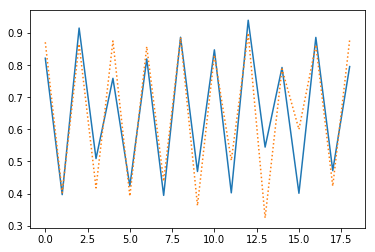

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(testPredict)

# plot baseline and predictions
plt.plot(arr_x[len(trainPredict)+9:len(trainPredict)+len(testPredict)+9], linestyle=':')
                            

In [22]:
print(trainPredict-y_train)


[[ 0.00386618 -0.46096407 -0.02813404 ... -0.46769635 -0.01043633
  -0.47084342]
 [ 0.48482127  0.01999103  0.45282105 ...  0.01325874  0.47051877
   0.01011168]
 [ 0.06381498 -0.40101526  0.03181476 ... -0.40774755  0.04951247
  -0.41089461]
 ...
 [ 0.48094661  0.01611637  0.44894639 ...  0.00938408  0.46664411
   0.00623702]
 [ 0.03313146 -0.43169878  0.00113124 ... -0.43843107  0.01882896
  -0.44157813]
 [ 0.50513108  0.04030083  0.47313086 ...  0.03356855  0.49082857
   0.03042148]]


In [23]:
aa = np.array([[1.0], [2.9], [3.8], [4.0]])
bb = np.array([[1.2], [2.5], [4.8], [4.2]])

# Calculate difference between prediction and actual 

In [24]:
print (y_test.shape)
print (y_test)

(19,)
[0.89996044 0.32411391 0.78863071 0.60009234 0.86393349 0.4231887
 0.87876009 0.38354686 0.8511792  0.45602341 0.89303781 0.3438766
 0.81225174 0.54899587 0.89135786 0.3486205  0.81750329 0.53708999
 0.8950476 ]


In [25]:
y_test_win = [[x] for x in y_test]
y_test_win = np.array(y_test_win)
print (y_test_win.shape)
print (y_test_win)

(19, 1)
[[0.89996044]
 [0.32411391]
 [0.78863071]
 [0.60009234]
 [0.86393349]
 [0.4231887 ]
 [0.87876009]
 [0.38354686]
 [0.8511792 ]
 [0.45602341]
 [0.89303781]
 [0.3438766 ]
 [0.81225174]
 [0.54899587]
 [0.89135786]
 [0.3486205 ]
 [0.81750329]
 [0.53708999]
 [0.8950476 ]]


In [26]:
print (testPredict.shape)
print (testPredict)

(19, 1)
[[0.8217729 ]
 [0.39666784]
 [0.91586155]
 [0.50916547]
 [0.75911427]
 [0.4237098 ]
 [0.81969935]
 [0.39439958]
 [0.8872253 ]
 [0.4688756 ]
 [0.8479636 ]
 [0.40227827]
 [0.94025296]
 [0.54491854]
 [0.7929686 ]
 [0.40092173]
 [0.8867401 ]
 [0.47158176]
 [0.79573977]]


In [27]:
test_diff = testPredict-y_test_win
print(testPredict-y_test_win)

[[-0.07818757]
 [ 0.07255392]
 [ 0.12723084]
 [-0.09092687]
 [-0.10481922]
 [ 0.00052111]
 [-0.05906074]
 [ 0.01085272]
 [ 0.03604607]
 [ 0.01285218]
 [-0.04507424]
 [ 0.05840168]
 [ 0.12800122]
 [-0.00407733]
 [-0.09838929]
 [ 0.05230123]
 [ 0.0692368 ]
 [-0.06550823]
 [-0.09930783]]


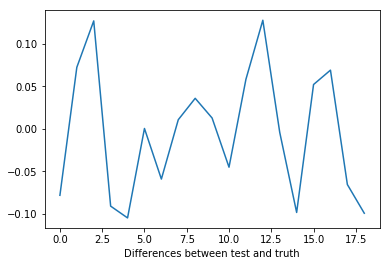

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(test_diff)
#plt.ylabel('some numbers')
plt.xlabel('Differences between test and truth')
plt.show()

## Add interactive graph here